#Sarcasm Detection ML Model

##Step 1: Data Selection and Preprocessing

###Preprocessing of the selected Datasets and making it such that they can be merged

In [55]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
!pip install emoji
import emoji
import re
import nltk
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score as acc
from sklearn.ensemble import AdaBoostClassifier
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import classification_report, accuracy_score
from nltk.tokenize import word_tokenize
from nltk.tokenize import TweetTokenizer
from sklearn.feature_extraction.text import TfidfVectorizer
from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import RandomOverSampler



In [3]:
df = pd.read_csv('test_v.csv', delimiter='\t')

In [54]:
df.head()

,Tweet,Sarcasm,tokens
0,Fantastic service yet again from EE. 1st you u...,1,"['Fantastic', 'service', 'yet', 'again', 'from..."
1,Not sure if that was or. I will take it! face_...,1,"['Not', 'sure', 'if', 'that', 'was', 'or', '.'..."
2,Barely 9 am and already shaking with rage.,1,"['Barely', '9', 'am', 'and', 'already', 'shaki..."
3,I guess that proves it then. Black folks have ...,1,"['I', 'guess', 'that', 'proves', 'it', 'then',..."
4,Does this tweet need a tag,1,"['Does', 'this', 'tweet', 'need', 'a', 'tag']"


In [4]:
df.tail()

,TrainSen,1,I loovee when people text back ... 😒 #sarcastictweet
1969,TrainSen,0,Sometimes truth is glaring you in the face - b...
1970,TrainSen,0,I just love not hanging out with my boyfriend .
1971,TrainSen,0,There is this 1 quince picture I have that I'm...
1972,TrainSen,0,I feel so ill at the moment that I cant speak ...
1973,TrainSen,0,I'm So Erked Nobody Better Not Speak To Me


In [5]:
df.shape

(1974, 3)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1974 entries, 0 to 1973
Data columns (total 3 columns):
 #   Column                                                Non-Null Count  Dtype 
---  ------                                                --------------  ----- 
 0   TrainSen                                              1974 non-null   object
 1   1                                                     1974 non-null   int64 
 2   I loovee when people text back ... 😒 #sarcastictweet  1974 non-null   object
dtypes: int64(1), object(2)
memory usage: 46.4+ KB


In [7]:
df.isnull().sum()

TrainSen                                                0
1                                                       0
I loovee when people text back ... 😒 #sarcastictweet    0
dtype: int64

In [8]:
df.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
1969    False
1970    False
1971    False
1972    False
1973    False
Length: 1974, dtype: bool

In [9]:
df.duplicated().sum()

0

In [10]:
for i in df.select_dtypes(include="object").columns:
    print(df[i].value_counts())
    print("***"*10)

TrainSen
TrainSen    1974
Name: count, dtype: int64
******************************
I loovee when people text back ... 😒 #sarcastictweet
Don't you love it when your parents are Pissed because you were gonna study after bubble soccer ! #IKnowIDo #not 😃 🔫                  1
MilesLong they don't listen ... seriously                                                                                             1
Been in the UK so I'm just catching up with Saturated - can't wait to hear God speak through your sermon !                            1
my ex is gonna start watching fairy tail im so happy i'll be able to speak to him about it                                            1
This lab class boring af                                                                                                              1
                                                                                                                                     ..
I lost AJ Green and Jamaal Charles from the same

In [11]:
df = pd.read_csv('test_v.csv', header=None, delimiter='\t')

# name the columns
df.columns = ['Train', 'Label', 'Tweets']

print(df.head())

# Save the new dataset
df.to_csv('Clean_set.csv', index=False)

      Train  Label                                             Tweets
0  TrainSen      1  I loovee when people text back ... 😒 #sarcasti...
1  TrainSen      1  Don't you love it when your parents are Pissed...
2  TrainSen      1      So many useless classes , great to be student
3  TrainSen      1  Oh how I love getting home from work at 3am an...
4  TrainSen      1          I just love having grungy ass hair 😑 #not


In [12]:
# Function to replace emojis with their text descriptions
def replace_emojis(text):
    return emoji.demojize(text, delimiters=("", ""))

# Load the dataset
df = pd.read_csv('Clean_set.csv')

# Replace emojis with text descriptions in the 'Tweets' column
df['Tweets'] = df['Tweets'].apply(replace_emojis)

df.to_csv('Clean_set.csv', index=False)

print(df.head())
if df.shape[1] == 3:
    df.columns = ['Train', 'Label', 'Tweets']

    # Drop the 'Train' column
    df = df.drop(columns=['Train'])

    df.to_csv('Clean_set.csv', index=False)
else:
    print("Unexpected number of columns in the dataset. Expected 3 columns, but found:", df.shape[1])

      Train  Label                                             Tweets
0  TrainSen      1  I loovee when people text back ... unamused_fa...
1  TrainSen      1  Don't you love it when your parents are Pissed...
2  TrainSen      1      So many useless classes , great to be student
3  TrainSen      1  Oh how I love getting home from work at 3am an...
4  TrainSen      1  I just love having grungy ass hair expressionl...


In [13]:
df.head()

,Label,Tweets
0,1,I loovee when people text back ... unamused_fa...
1,1,Don't you love it when your parents are Pissed...
2,1,"So many useless classes , great to be student"
3,1,Oh how I love getting home from work at 3am an...
4,1,I just love having grungy ass hair expressionl...


In [14]:
abbreviations = {
    'lol': 'laugh out loud',
    'brb': 'be right back',
    'btw': 'by the way',
    'omg': 'oh my god',
    'tbh': 'to be honest',
    'fyi': 'for your information',
    'idk': 'I don\'t know',
    'imo': 'in my opinion',
    'imho': 'in my humble opinion',
    'np': 'no problem',
    'tmi': 'too much information',
    'smh': 'shake my head',
    'irl': 'in real life',
    'afk': 'away from keyboard',
    'fomo': 'fear of missing out',
    'imo': 'in my opinion',
    'irl': 'in real life',
    'omw': 'on my way',
    'rofl': 'rolling on the floor laughing',
    'afaik': 'as far as I know',
    'gg': 'good game',
    'ggwp': 'good game, well played',
    'icymi': 'in case you missed it',
    'nvm': 'never mind',
    'ttyl': 'talk to you later',
    'ftw': 'for the win',
    'smh': 'shaking my head',
}

def replace_abbreviations(text):
    for word in text.split():
        if word.lower() in abbreviations:
            text = text.replace(word, abbreviations[word.lower()])
    return text

df = pd.read_csv('Clean_set.csv')
df['Tweets'] = df['Tweets'].apply(replace_abbreviations)
df.to_csv('Clean_set.csv', index=False)

In [15]:
def clean_text(text):
    # Remove URLs
    text = re.sub(r'http\S+', '', text)
    # Remove URLs that start with www
    text = re.sub(r'www\S+', '', text)
    # Remove @mentions
    text = re.sub(r'@\w+', '', text)
    # Remove #hashtags
    text = re.sub(r'#\w+', '', text)
    return text

def process_tweets(input_filepath, output_filepath):
    with open(input_filepath, 'r') as file, open(output_filepath, 'w') as outfile:
        for line in file:
            cleaned_line = clean_text(line)
            outfile.write(cleaned_line)
input_file_path = 'Clean_set.csv'
output_file_path = 'path_to_your_output_file.csv'
process_tweets(input_file_path, output_file_path)

In [16]:
df.head()

,Label,Tweets
0,1,I loovee when people text back ... unamused_fa...
1,1,Don't you love it when your parents are Pissed...
2,1,"So many useless classes , great to be student"
3,1,Oh how I love getting home from work at 3am an...
4,1,I just love having grungy ass hair expressionl...


In [17]:
# Load the dataset
df4 = pd.read_csv('fd2.csv')


df['Label'] = df['Label'].replace({'sarcastic': 'yes', 'not sarcastic': 'no'})


df.to_csv('Clean_Dataset.csv', index=False)

In [18]:
df.head()

,Label,Tweets
0,1,I loovee when people text back ... unamused_fa...
1,1,Don't you love it when your parents are Pissed...
2,1,"So many useless classes , great to be student"
3,1,Oh how I love getting home from work at 3am an...
4,1,I just love having grungy ass hair expressionl...


In [19]:
df.rename(columns={'Label': 'Sarcasm'}, inplace=True)

In [20]:
df.head()

,Sarcasm,Tweets
0,1,I loovee when people text back ... unamused_fa...
1,1,Don't you love it when your parents are Pissed...
2,1,"So many useless classes , great to be student"
3,1,Oh how I love getting home from work at 3am an...
4,1,I just love having grungy ass hair expressionl...


In [21]:
df.tail()

,Sarcasm,Tweets
1970,0,Sometimes truth is glaring you in the face - b...
1971,0,I just love not hanging out with my boyfriend .
1972,0,There is this 1 quince picture I have that I'm...
1973,0,I feel so ill at the moment that I cant speak ...
1974,0,I'm So Erked Nobody Better Not Speak To Me


In [22]:
df.to_csv('Clean_Dataset.csv', index=False)

In [23]:
df.head()

,Sarcasm,Tweets
0,1,I loovee when people text back ... unamused_fa...
1,1,Don't you love it when your parents are Pissed...
2,1,"So many useless classes , great to be student"
3,1,Oh how I love getting home from work at 3am an...
4,1,I just love having grungy ass hair expressionl...


In [24]:
df['Sarcasm'] = df['Sarcasm'].replace({1: 'yes', 0: 'no'})



In [25]:
df.head()

,Sarcasm,Tweets
0,yes,I loovee when people text back ... unamused_fa...
1,yes,Don't you love it when your parents are Pissed...
2,yes,"So many useless classes , great to be student"
3,yes,Oh how I love getting home from work at 3am an...
4,yes,I just love having grungy ass hair expressionl...


In [26]:
df.tail()

,Sarcasm,Tweets
1970,no,Sometimes truth is glaring you in the face - b...
1971,no,I just love not hanging out with my boyfriend .
1972,no,There is this 1 quince picture I have that I'm...
1973,no,I feel so ill at the moment that I cant speak ...
1974,no,I'm So Erked Nobody Better Not Speak To Me


###Merging the 2 Selected datasets
The 2 datasets are extrated from a Hugging face.
Dataset 1 is stored under the name fd1.csv and datset 2 is stored as fdfd.csv

In [27]:
df1 = pd.read_csv('fd1.csv')
df2 = pd.read_csv('fdfd.csv')

In [28]:
merged_df = pd.concat([df1, df2], ignore_index=True)

merged_df.to_csv('merged_file.csv', index=False)

print("Merged dataset saved as 'merged_file.csv'.")

Merged dataset saved as 'merged_file.csv'.


In [29]:
merged_df.head()

,Tweet,Sarcasm
0,Fantastic service yet again from EE. 1st you u...,yes
1,Not sure if that was or. I will take it! face_...,yes
2,Barely 9 am and already shaking with rage.,yes
3,I guess that proves it then. Black folks have ...,yes
4,Does this tweet need a tag,yes


In [30]:
merged_df.tail()

,Tweet,Sarcasm
2976,Sometimes truth is glaring you in the face bl...,no
2977,I just love not hanging out with my boyfriend .,no
2978,There is this 1 quince picture I have that I'm...,no
2979,I feel so ill at the moment that I cant speak ...,no
2980,I'm So Erked Nobody Better Not Speak To Me,no


In [31]:
df3 = pd.read_csv('merged_file.csv')

In [32]:
df3.shape

(2981, 2)

##Step 2: Tokenization

In [37]:
df5 = pd.read_csv('merged_file.csv')
df5.head()


,Tweet,Sarcasm
0,Fantastic service yet again from EE. 1st you u...,yes
1,Not sure if that was or. I will take it! face_...,yes
2,Barely 9 am and already shaking with rage.,yes
3,I guess that proves it then. Black folks have ...,yes
4,Does this tweet need a tag,yes


###Word Tokenization

In [56]:
tokenizer = TweetTokenizer()

def tokenize_text(Tweet):
    return tokenizer.tokenize(Tweet)

df = pd.read_csv('merged_file.csv')
df['tokens'] = df['Tweet'].apply(tokenize_text)

print(df.head(15))
df.to_csv('t_dataset.csv', index=False)

                                                Tweet Sarcasm  \
0   Fantastic service yet again from EE. 1st you u...     yes   
1   Not sure if that was or. I will take it! face_...     yes   
2          Barely 9 am and already shaking with rage.     yes   
3   I guess that proves it then. Black folks have ...     yes   
4                          Does this tweet need a tag     yes   
5   both. Wont be using you again. Made a formal c...     yes   
6                Fuuuuuuuuck this shit screams thug!!     yes   
7   66 UEs from Staniel and he wins in straights. ...     yes   
8              totally surprising to every husker fan     yes   
9                     Haha got to love the enthusiasm     yes   
10  a southern pride advocate but of course it has...     yes   
11  So nice not hearing any rumors that the  are n...     yes   
12  We should divide illegals into two lines one f...     yes   
13      does not even look like that great of a view.     yes   
14  Mondays are always dr

##Step 3: Encoding

TF-IDF Encoding

In [57]:
tweets = df['Tweet']
tfidf_vectorizer = TfidfVectorizer()
X = tfidf_vectorizer.fit_transform(tweets)
tfidf_df = pd.DataFrame(X.toarray(), columns=tfidf_vectorizer.get_feature_names_out())
final_df = pd.concat([df.drop('Tweet', axis=1), tfidf_df], axis=1)
final_df.to_csv("tfidf_encoded_tweets.csv", index=False)


##Step 4: Handling Imbalances in our Dataset

In [40]:
df = pd.read_csv('merged_file.csv', index_col=False)

In [41]:
y = df['Sarcasm']
y.value_counts()

Sarcasm
yes    1687
no     1294
Name: count, dtype: int64

<Axes: ylabel='count'>

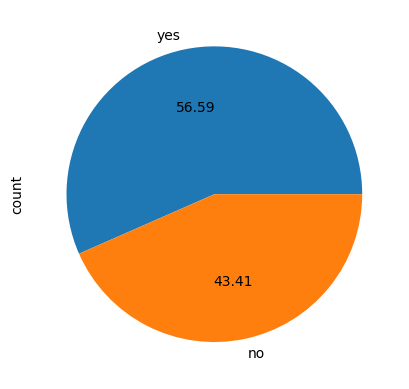

In [42]:
y.value_counts().plot.pie(autopct='%.2f')

([<matplotlib.patches.Wedge at 0x7fb85f3937c0>,
 [Text(-0.226169841734911, 1.0764976556823547, 'yes'),
  Text(0.2261698417349104, -1.076497655682355, 'no')],
 [Text(-0.12336536821904236, 0.5871805394631026, '56.59'),
  Text(0.12336536821904202, -0.5871805394631026, '43.41')])

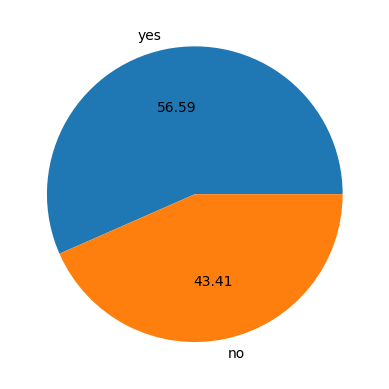

In [43]:
fig1, ax1 = plt.subplots()
ax1.pie(y.value_counts(), autopct='%.2f', labels=y.value_counts().index)

### Random Oversampling
Random oversampling is a technique in machine learning to address imbalanced datasets by randomly duplicating instances from the minority class. This balances the dataset and helps improve the model's ability to predict the minority class accurately

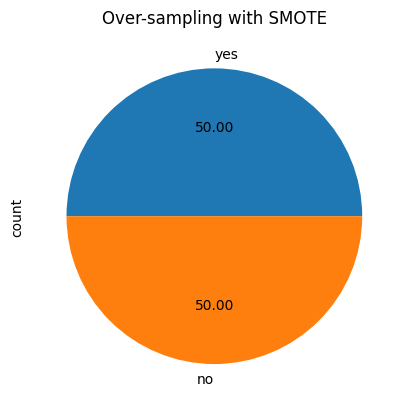

In [58]:
# Convert text data to numerical data using TF-IDF
tfidf = TfidfVectorizer()
tfidf = TfidfVectorizer()
X_tfidf = tfidf.fit_transform(df['Tweet'])
y = df['Sarcasm']
smote = SMOTE()
X_resampled, y_resampled = smote.fit_resample(X_tfidf, y)
ax = y_resampled.value_counts().plot.pie(autopct='%.2f')
_ = ax.set_title("Over-sampling with SMOTE")
plt.show()

In [45]:
y_resampled.value_counts()


Sarcasm
yes    1687
no     1687
Name: count, dtype: int64

##Step 5: ML Model Selection

In [46]:
df = pd.read_csv('t_dataset.csv', index_col=False)

df['Sarcasm'] = df['Sarcasm'].map({'yes': 1, 'no': 0})

In [47]:
X_train, X_test, y_train, y_test = train_test_split(df['Tweet'], df['Sarcasm'], test_size=0.2, random_state=42)

vectorizer = TfidfVectorizer(max_features=5000, ngram_range=(1, 2))
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

In [48]:
def acc(x, y):
    accuracy = accuracy_score(x, y)
    print(f'Accuracy: {accuracy * 100:.2f}%')

    print("Classification Report:")
    print(classification_report(x, y))

In [49]:
model = LogisticRegression()
model.fit(X_train_tfidf, y_train)

y_pred = model.predict(X_test_tfidf)
y_pred_prob = model.predict_proba(X_test_tfidf)[:, 1]

acc(y_test, y_pred)

Accuracy: 77.89%
Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.59      0.69       250
           1       0.76      0.91      0.83       347

    accuracy                           0.78       597
   macro avg       0.79      0.75      0.76       597
weighted avg       0.79      0.78      0.77       597



##Step 6: Hyperparameter Training

In [52]:
# Logistic Regression Hyperparameter Tuning
log_reg_params = {
    'C': [0.01, 0.1, 1, 10, 100],
    'solver': ['liblinear', 'lbfgs']
}
log_reg = LogisticRegression(max_iter=1000)
log_reg_grid = GridSearchCV(log_reg, log_reg_params, cv=5, scoring='accuracy')
log_reg_grid.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(max_iter=1000),
             param_grid={'C': [0.01, 0.1, 1, 10, 100],
                         'solver': ['liblinear', 'lbfgs']},
             scoring='accuracy')

In [53]:
# Evaluate Logistic Regression
log_reg_best = log_reg_grid.best_estimator_
log_reg_pred = log_reg_best.predict(X_test)
print("Logistic Regression Best Parameters:", log_reg_grid.best_params_)
print("Logistic Regression Accuracy:", accuracy_score(y_test, log_reg_pred))
print("Logistic Regression Classification Report:\n", classification_report(y_test, log_reg_pred))

Logistic Regression Best Parameters: {'C': 0.1, 'solver': 'liblinear'}
Logistic Regression Accuracy: 0.7989949748743719
Logistic Regression Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.55      0.70       250
           1       0.75      0.98      0.85       347

    accuracy                           0.80       597
   macro avg       0.85      0.76      0.77       597
weighted avg       0.83      0.80      0.79       597



#Conclusion
###Data Preprocessing:

Loaded the dataset and displayed basic information.

Cleaned the data by removing @,# and URLs and also emojis.

###Encoded and Tokenized the labels.

###Handling Imbalanced Data:

Used SMOTE to handle imbalanced data. Visualized the class distribution before and after resampling.

###Evaluating the Model:

We explored different ML Models and found Logistic Regression to have the best accuracy-77.89%.
Logistic Regression improved its accuracy after tuning and now perform comparably well.
Evaluated the model using classification report, confusion matrix, and accuracy score.
tested the model with new random tweets.
###Hyperparameter Tuning:

Performed Grid Search to find the best hyperparameters. Displayed the best parameters and the best score.